### Multiple Regession Model

In [22]:
# Necessary imports\n",
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error, log_loss 

In [23]:
file_name = os.path.join(os.getcwd(), "final_dataset.csv")
df = pd.read_csv(file_name, header=0)

In [24]:
X = df[['Avg Temp']]
y = df['cases_per_100K_7_day_count_change'].values.reshape(-1,1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)

y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_scaled = y_scaler.transform(y_train)

In [27]:
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train_scaled)

Ridge()

In [28]:
X_test_scaled = X_scaler.transform(X_test)
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1))

In [29]:
rmse = np.sqrt(np.mean((y_test-y_pred)**2)) / (max(y) - min(y)).item()
print(f'Root Mean Square Error (RMSE): {rmse}')

Root Mean Square Error (RMSE): 0.009702187463311491


rmse = np.sqrt(np.mean((y_test-y_pred)**2)) / (max(y_data) - min(y_data)).item()

print(rmse)

# Temperature Fluctuations 

In [30]:
#Set up
filename = os.path.join(os.getcwd(), "final_dataset.csv")
df_flux = pd.read_csv(filename, header=0)

In [31]:
#Separate features and target
x_flux = df_flux[['Temp Flux']]
y_flux = df_flux['cases_per_100K_7_day_count_change'].values.reshape(-1,1)

#Training and testing sets
X_flux_train, X_flux_test, y_flux_train, y_flux_test = train_test_split(x_flux, y_flux, test_size=0.3, random_state=42)

#Scale variables
x_flux_scaler = StandardScaler()
x_flux_train_scaled = x_flux_scaler.fit_transform(X_flux_train)
x_flux_test_scaled = x_flux_scaler.transform(X_flux_test)

# y_flux_scaler = StandardScaler()
# y_flux_scaler.fit(y_flux_train)
# y_flux_train_scaled = y_flux_scaler.transform(y_flux_train)

# #Fit the model
# # model = Ridge(alpha=1.0)
# # model.fit(x_flux_train_scaled, y_flux_train_scaled)
linear_model = LinearRegression()
linear_model.fit(x_flux_train_scaled, y_flux_train)

LinearRegression()

In [32]:
#Prediction
x_flux_test_scaled = x_flux_scaler.transform(X_flux_test)
# y_flux_pred_scaled = model.predict(x_flux_test_scaled)
# y_flux_pred = y_flux_scaler.inverse_transform(y_flux_pred_scaled.reshape(-1,1))
y_flux_pred = linear_model.predict(x_flux_test_scaled)

In [33]:
#Finding RMSE 
rmse_flux = np.sqrt(mean_squared_error(y_flux_test, y_flux_pred))
print("Root Mean Squared Error (RMSE): ", rmse_flux)

threshold = 0.1
y_flux_test_binary = (y_flux_test > threshold).astype(int)
y_flux_pred_binary = (y_flux_pred > threshold).astype(int)

#Finding Log loss and accuracy
log_loss_val = log_loss(y_flux_test_binary, y_flux_pred_binary)
accuracy = np.mean(y_flux_test_binary==y_flux_pred_binary)

print("Log Loss: ", log_loss_val)
print("Accuracy: ", accuracy)

Root Mean Squared Error (RMSE):  95.35550887290042
Log Loss:  3.926248100837979
Accuracy:  0.891069641069641


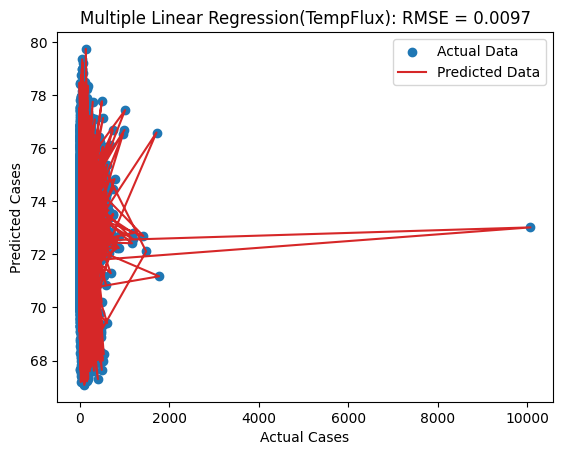

In [34]:
#Graphing results
plt.scatter(y_flux_test, y_flux_pred, color='tab:blue', label='Actual Data')
plt.plot(y_flux_test, y_flux_pred, color='tab:red', label='Predicted Data')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.title(f'Multiple Linear Regression(TempFlux): RMSE = {rmse:.4f}')
plt.legend()
plt.show()